**PyCaret's Regression Module** *is a supervised machine learning module that is used for estimating the relationships between a dependent variable (often called the outcome variable, or target) and one or more independent variables (often called features, predictors, or covariates).The objective of regression is to predict continuous values such as predicting sales amount, predicting quantity, predicting temperature, etc. Regression module provides several pre-processing features to preprocess the data for modeling through the setup function.*

*Pycaret Installation*

In [3]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

In [4]:
import pycaret
pycaret.__version__

'3.3.2'

*Load sample dataset from pycaret dataset module*

In [2]:
from pycaret.datasets import get_data
data = get_data('diamond')
print(data.shape)

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


(6000, 8)


*The setup function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. data and target.*

In [3]:
from pycaret.regression import *
s = setup(data, target = 'Price', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


*PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.*

*With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.*

In [18]:
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

*Check the type of exp*

In [19]:
type(exp)

pycaret.regression.oop.RegressionExperiment

*init setup on exp*

In [20]:
exp.setup(data, target = 'Price', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Price
2,Target type,Regression
3,Original data shape,"(6000, 8)"
4,Transformed data shape,"(6000, 29)"
5,Transformed train set shape,"(4200, 29)"
6,Transformed test set shape,"(1800, 29)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


**Compare Models** : *The compare_models function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores.*

In [27]:
best = compare_models(include=['lr', 'et', 'rf', 'ridge', 'br'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,719.6871,2033874.0284,1390.8879,0.9809,0.0786,0.0585,0.4700
rf,Random Forest Regressor,725.2299,2336386.4997,1491.5615,0.9781,0.0785,0.0577,0.2100
ridge,Ridge Regression,2491.2859,14957594.1466,3840.8633,0.8568,0.6470,0.2966,0.0340
br,Bayesian Ridge,2493.3298,14989750.3796,3844.9434,0.8565,0.6497,0.2967,0.0330
lr,Linear Regression,2495.1160,15000904.0105,3847.0952,0.8563,0.6535,0.2969,0.4520


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

In [30]:
!pip install catboost
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 81.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of selenium to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

*Choose catboost to avoid plot errors with some models*

In [4]:
best = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,594.1517,1510915.8180,1229.1932,0.9864,0.0679,0.0496
1,554.1398,1111897.5851,1054.4655,0.9865,0.0622,0.0466
2,614.4549,1585110.0720,1259.0115,0.9859,0.0641,0.0482
3,631.8860,1481449.4971,1217.1481,0.9868,0.0655,0.0480
4,521.9742,770492.8839,877.7772,0.9924,0.0596,0.0440
5,576.7466,1054787.9028,1027.0287,0.9878,0.0667,0.0477
6,681.2936,3256580.3399,1804.5998,0.9755,0.0689,0.0504
7,580.4299,1221268.8303,1105.1103,0.9879,0.0668,0.0461
8,596.9755,1303330.1185,1141.6348,0.9874,0.0641,0.0492


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

*Check the available models*

In [5]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


*You can use the include and exclude parameter in the compare_models to train only select model or exclude specific models from training by passing the model id's in exclude parameter.*

In [7]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'xgboost'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,669.4844,1821212.1477,1331.1471,0.9826,0.0722,0.0530,0.0550
et,Extra Trees Regressor,719.6871,2033874.0284,1390.8879,0.9809,0.0786,0.0585,0.2530
rf,Random Forest Regressor,725.2299,2336386.4997,1491.5615,0.9781,0.0785,0.0577,0.4490
gbr,Gradient Boosting Regressor,870.4619,2677900.4116,1616.3756,0.9744,0.0990,0.0750,0.0820
dt,Decision Tree Regressor,919.7628,3495425.3910,1821.5832,0.9664,0.1025,0.0744,0.4850


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

In [8]:
compare_tree_models

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=123, ...)

*The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use pull function to access the dataframe.*

In [9]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,669.4844,1.821212e+06,1331.1471,0.9826,0.0722,0.0530,0.055
et,Extra Trees Regressor,719.6871,2.033874e+06,1390.8879,0.9809,0.0786,0.0585,0.253
rf,Random Forest Regressor,725.2299,2.336386e+06,1491.5615,0.9781,0.0785,0.0577,0.449
gbr,Gradient Boosting Regressor,870.4619,2.677900e+06,1616.3756,0.9744,0.0990,0.0750,0.082
dt,Decision Tree Regressor,919.7628,3.495425e+06,1821.5832,0.9664,0.1025,0.0744,0.485


*By default compare_models return the single best performing model based on the metric defined in the sort parameter.*

In [12]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3,include=['lr', 'et', 'rf', 'ridge', 'br','lasso','par','xgboost','knn','en','lar'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,669.4844,1821212.1477,1331.1471,0.9826,0.0722,0.0530,0.0510
et,Extra Trees Regressor,719.6871,2033874.0284,1390.8879,0.9809,0.0786,0.0585,0.4950
rf,Random Forest Regressor,725.2299,2336386.4997,1491.5615,0.9781,0.0785,0.0577,0.2280
par,Passive Aggressive Regressor,1990.8657,21450892.1041,4581.8290,0.7966,0.4036,0.1613,0.0360
lasso,Lasso Regression,2490.7990,14993880.8447,3845.5124,0.8565,0.6525,0.2961,0.0400
ridge,Ridge Regression,2491.2859,14957594.1466,3840.8633,0.8568,0.6470,0.2966,0.0310
br,Bayesian Ridge,2493.3298,14989750.3796,3844.9434,0.8565,0.6497,0.2967,0.0320
lr,Linear Regression,2495.1160,15000904.0105,3847.0952,0.8563,0.6535,0.2969,0.4890
knn,K Neighbors Regressor,2941.9684,29975553.3229,5444.1350,0.7114,0.3648,0.2708,0.0380
en,Elastic Net,5094.9781,58154229.7819,7593.6540,0.4407,0.5372,0.5835,0.0310


Processing:   0%|          | 0/51 [00:00<?, ?it/s]

In [13]:
best_mae_models_top3

[XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=123, ...),
 ExtraTreesRegressor(n_jobs=-1, random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123)]

**Analyze Model** : *The plot_model function is used to analyze the performance of a trained model on the test set. It may require re-training the model in certain cases.*

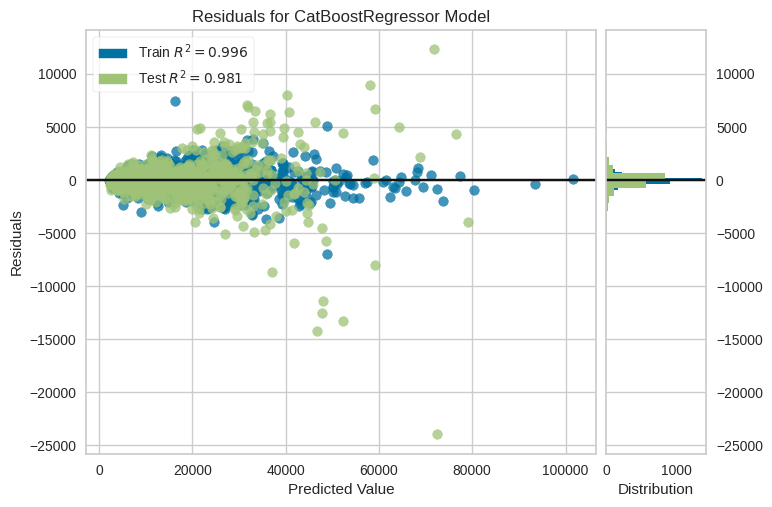

In [14]:
plot_model(best, plot = 'residuals')

*Plot error*

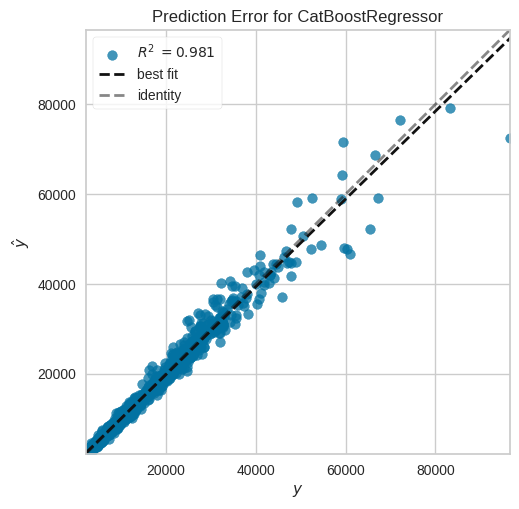

In [15]:
plot_model(best, plot = 'error')

*Plot feature importance*

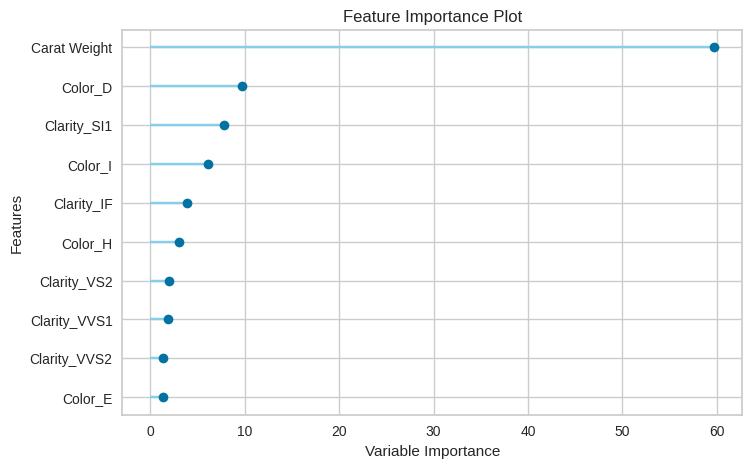

In [16]:
plot_model(best, plot = 'feature')

*An alternate to plot_model function is evaluate_model. It can only be used in Notebook since it uses ipywidget.*

In [17]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Prediction:** *The predict_model function returns prediction_label as new column to the input dataframe. When data is None (default), it uses the test set (created during the setup function) for scoring.*

*Predict on test set*

In [18]:
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,640.2231,2024988.6119,1423.0209,0.9806,0.0666,0.0486


*Show predictions df*

In [19]:
holdout_pred.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,prediction_label
1201,0.75,Ideal,G,VVS2,EX,EX,GIA,3879,3834.634743
1084,1.08,Ideal,F,SI1,VG,VG,GIA,5534,5770.233293
2060,1.29,Very Good,G,VS1,G,VG,GIA,9105,9600.678453
248,1.19,Ideal,G,VS1,ID,ID,AGSL,8034,8567.289163
5603,1.01,Very Good,E,SI1,VG,VG,GIA,5384,5351.944959


*The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the Price. We can then use the new data frame without labels for scoring.*

In [20]:
new_data = data.copy()
new_data.drop('Price', axis=1, inplace=True)
new_data.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report
0,1.10,Ideal,H,SI1,VG,EX,GIA
1,0.83,Ideal,H,VS1,ID,ID,AGSL
2,0.85,Ideal,H,SI1,EX,EX,GIA
3,0.91,Ideal,E,SI1,VG,VG,GIA
4,0.83,Ideal,G,SI1,EX,EX,GIA


*Predict model on new_data*

In [21]:
predictions = predict_model(best, data = new_data)
predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,prediction_label
0,1.10,Ideal,H,SI1,VG,EX,GIA,5460.455394
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3580.091140
2,0.85,Ideal,H,SI1,EX,EX,GIA,3468.547447
3,0.91,Ideal,E,SI1,VG,VG,GIA,4449.022685
4,0.83,Ideal,G,SI1,EX,EX,GIA,3450.363353


**Save Model** : *you can save the entire pipeline on disk for later use, using pycaret's save_model function.*

In [22]:
save_model(best, 'my_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Carat Weight'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'Polish', 'Symmetry', 'Report'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Rep...
                 ('onehot_encoding',
                  TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                              'Polish', 'Symmetry'],
                                     transformer=OneHotEncoder(cols=['Cut',
                                                                     'Color',
                                                                     'Clarity',


*Load pipeline*

In [23]:
loaded_best_pipeline = load_model('my_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Carat Weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                             'Polish', 'Symmetry', 'Report'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(in...
                ('onehot_encoding',
                 TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                             'Polish', 'Symmetry'],
                                    transformer=OneHotEncoder(cols=['Cut',
                                                                    'Color',
                                                                    'Clarity',
                                                                    'Polish',
                                                                    'Symmetry'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7d50fc1ec9d0>)])

**Create Model** : *The create_model function trains and evaluates the performance of a given estimator using cross-validation. The output of this function is a scoring grid with CV scores by fold*.

*Check all the available models*

In [24]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


*Train linear regression with default fold=10*

In [25]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2430.6429,15324383.1952,3914.6370,0.8620,0.7417,0.3081
1,2324.1476,10022874.7286,3165.8924,0.8783,0.6110,0.2939
2,2553.0220,20064281.4697,4479.3171,0.8209,0.6727,0.2904
3,2659.4952,16867140.5476,4106.9624,0.8497,0.6781,0.2837
4,2589.1238,14910656.7952,3861.4320,0.8536,0.7452,0.3177
5,2482.6905,12322909.7286,3510.4002,0.8579,0.6132,0.3138
6,2555.1098,22035640.1495,4694.2135,0.8343,0.5162,0.2698
7,2606.3976,13733752.5929,3705.9078,0.8645,0.7431,0.3169
8,2396.1643,12559990.9310,3544.0077,0.8789,0.5764,0.2868


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

*If you need access to the scoring grid you can use pull function to access the dataframe.*

In [26]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2430.6429,1.532438e+07,3914.6370,0.8620,0.7417,0.3081
1,2324.1476,1.002287e+07,3165.8924,0.8783,0.6110,0.2939
2,2553.0220,2.006428e+07,4479.3171,0.8209,0.6727,0.2904
3,2659.4952,1.686714e+07,4106.9624,0.8497,0.6781,0.2837
4,2589.1238,1.491066e+07,3861.4320,0.8536,0.7452,0.3177
5,2482.6905,1.232291e+07,3510.4002,0.8579,0.6132,0.3138
6,2555.1098,2.203564e+07,4694.2135,0.8343,0.5162,0.2698
7,2606.3976,1.373375e+07,3705.9078,0.8645,0.7431,0.3169
8,2396.1643,1.255999e+07,3544.0077,0.8789,0.5764,0.2868


*Train linear regression with fold=3*

In [27]:
lr = create_model('lr', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2477.6286,15648581.2029,3955.8288,0.8446,0.7362,0.3040
1,2552.3414,16306448.2343,4038.1243,0.8475,0.6115,0.2952
2,2496.7329,14351836.4529,3788.3818,0.8601,0.6985,0.2970
Mean,2508.9010,15435621.9633,3927.4450,0.8507,0.6821,0.2987
Std,31.6917,812051.1200,103.9136,0.0067,0.0522,0.0038


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

*Train linear regression with specific model parameters*

In [28]:
create_model('lr', fit_intercept = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2430.4233,15337495.0835,3916.3114,0.8619,0.7479,0.3076
1,2321.0406,9999453.7651,3162.1913,0.8786,0.6045,0.2937
2,2553.0220,20064281.4697,4479.3171,0.8209,0.6727,0.2904
3,2660.3087,16865948.5612,4106.8173,0.8497,0.6611,0.2837
4,2591.1552,14886466.6844,3858.2984,0.8539,0.7002,0.3189
5,2479.2013,12307098.6621,3508.1475,0.8581,0.5750,0.3134
6,2555.1098,22035640.1495,4694.2135,0.8343,0.5162,0.2698
7,2606.2415,13737500.9567,3706.4135,0.8644,0.7520,0.3168
8,2388.9518,12547091.6493,3542.1874,0.8790,0.6254,0.2855


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(fit_intercept=False, n_jobs=-1)

*Train lr and return train score as well alongwith CV*

In [29]:
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

**Tune Model** : *The `tune_model` function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold.*

*Train a dt model with default params*

In [30]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,884.8298,2443056.3810,1563.0280,0.9780,0.1096,0.0783
1,944.6665,3251502.1693,1803.1922,0.9605,0.0982,0.0755
2,878.6117,2587912.5588,1608.6990,0.9769,0.0949,0.0708
3,933.7793,3090874.6479,1758.0884,0.9725,0.0976,0.0705
4,873.3988,2838114.7350,1684.6705,0.9721,0.1017,0.0712
5,886.9412,2181091.7969,1476.8520,0.9748,0.1031,0.0746
6,985.6358,6178384.9829,2485.6357,0.9535,0.1062,0.0770
7,1090.9933,7689354.3009,2772.9685,0.9241,0.1095,0.0785
8,884.7069,2482312.3285,1575.5356,0.9761,0.1035,0.0754


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

*Tune hyperparameters of dt*

In [31]:
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,965.0735,3936143.9925,1983.9718,0.9646,0.1141,0.0800
1,983.4389,3251389.7700,1803.1610,0.9605,0.1051,0.0797
2,988.8764,4189714.1051,2046.8791,0.9626,0.1050,0.0766
3,1047.1241,3253723.9006,1803.8082,0.9710,0.1061,0.0803
4,882.2025,2156566.6859,1468.5253,0.9788,0.1043,0.0740
5,946.6805,2691987.6565,1640.7278,0.9690,0.1041,0.0811
6,1085.0090,6441235.2658,2537.9589,0.9516,0.1205,0.0855
7,1079.5912,7680079.1446,2771.2956,0.9242,0.1115,0.0808
8,943.3914,2953665.1687,1718.6230,0.9715,0.1051,0.0809


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [32]:
dt

DecisionTreeRegressor(random_state=123)

*Define tuning grid and tune model with custom grid and metric = MAE*

In [33]:
dt_grid = {'max_depth' : [None, 2, 4, 6, 8, 10, 12]}
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,942.0624,2921739.5465,1709.3097,0.9737,0.1102,0.0782
1,893.1408,2787312.3718,1669.5246,0.9662,0.0952,0.0729
2,816.8039,2357640.6751,1535.4611,0.9790,0.0936,0.0674
3,934.8106,2925240.0489,1710.3333,0.9739,0.0935,0.0694
4,829.7284,2174085.1873,1474.4779,0.9787,0.0993,0.0694
5,849.7631,2203174.2370,1484.3093,0.9746,0.1013,0.0739
6,973.4781,4587585.7123,2141.8650,0.9655,0.1029,0.0783
7,983.8168,7221829.0817,2687.3461,0.9287,0.1025,0.0723
8,838.8386,2229246.3515,1493.0661,0.9785,0.0951,0.0712


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


To access the tuner object you can set return_tuner = True

In [34]:
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,965.0735,3936143.9925,1983.9718,0.9646,0.1141,0.0800
1,983.4389,3251389.7700,1803.1610,0.9605,0.1051,0.0797
2,988.8764,4189714.1051,2046.8791,0.9626,0.1050,0.0766
3,1047.1241,3253723.9006,1803.8082,0.9710,0.1061,0.0803
4,882.2025,2156566.6859,1468.5253,0.9788,0.1043,0.0740
5,946.6805,2691987.6565,1640.7278,0.9690,0.1041,0.0811
6,1085.0090,6441235.2658,2537.9589,0.9516,0.1205,0.0855
7,1079.5912,7680079.1446,2771.2956,0.9242,0.1115,0.0808
8,943.3914,2953665.1687,1718.6230,0.9715,0.1051,0.0809


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


*Model object*

In [35]:
tuned_dt

DecisionTreeRegressor(random_state=123)

*Tuner object*

In [36]:
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['Carat '
                                                                          'Weight'],
                                                                 transformer=SimpleImputer())),
                                             ('categorical_imputer',
                                              TransformerWrapper(include=['Cut',
                                                                          'Color',
                                                                          'Clarity',
                                                                          'Polish',
                                                                          'Symmetry',
                                                                          'Report'],
                                                                 transformer=SimpleImp...
                                                                        7, 8, 9,
                                                                        10, 11,
                                                                        12, 13,
                                                                        14, 15,
                                                                        16],
                                        'actual_estimator__max_features': [1.0,
                                                                           'sqrt',
                                                                           'log2'],
                                        'actual_estimator__min_impurity_decrease': [0,
                                                                                    0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10]},
                   random_state=123,

*Tune dt using optuna*

In [37]:
tuned_dt = tune_model(dt, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,963.9131,3848362.7304,1961.7244,0.9653,0.1136,0.0806
1,871.2405,2687326.5048,1639.3067,0.9674,0.0978,0.0727
2,947.1214,5104119.1298,2259.2298,0.9544,0.1057,0.0728
3,1012.5905,4330852.8071,2081.0701,0.9614,0.1006,0.0725
4,838.8964,2698992.3732,1642.8610,0.9735,0.0999,0.0698
5,851.7321,2124932.7518,1457.7149,0.9755,0.0978,0.0731
6,981.3845,6417829.0970,2533.3435,0.9517,0.1035,0.0735
7,967.4714,3770980.8345,1941.9013,0.9628,0.1046,0.0738
8,909.4976,3089419.0298,1757.6743,0.9702,0.0995,0.0743


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

INFO:optuna_integration.sklearn.sklearn:Searching the best hyperparameters using 4200 samples...
INFO:optuna_integration.sklearn.sklearn:Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Ensemble Model** : *The ensemble_model function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the get_metrics function.*

*Ensemble with bagging*

In [38]:
ensemble_model(dt, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,796.5460,2487167.5157,1577.0756,0.9776,0.0884,0.0645
1,738.9581,1812170.5748,1346.1689,0.9780,0.0785,0.0598
2,817.1991,3102154.4751,1761.2934,0.9723,0.0816,0.0606
3,808.9704,2229792.9211,1493.2491,0.9801,0.0819,0.0601
4,663.1998,1394314.2024,1180.8108,0.9863,0.0785,0.0560
5,748.4263,1957833.6740,1399.2261,0.9774,0.0807,0.0607
6,862.3998,5686601.8465,2384.6597,0.9572,0.0904,0.0658
7,792.3258,2644970.2717,1626.3365,0.9739,0.0821,0.0593
8,748.0899,1951850.5168,1397.0864,0.9812,0.0834,0.0628


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(estimator=DecisionTreeRegressor(random_state=123),
                 random_state=123)

*Ensemble with Boosting*

In [39]:
ensemble_model(dt, method = 'Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,800.8876,2749640.3471,1658.2040,0.9752,0.0957,0.0669
1,814.9506,2620594.4275,1618.8250,0.9682,0.0876,0.0664
2,787.8853,2274927.3539,1508.2862,0.9797,0.0866,0.0627
3,876.2170,2859547.5538,1691.0197,0.9745,0.0934,0.0655
4,748.1157,1981820.7212,1407.7715,0.9805,0.0899,0.0610
5,759.1161,1981659.3355,1407.7142,0.9771,0.0881,0.0642
6,989.2560,9037394.7938,3006.2260,0.9320,0.1014,0.0698
7,895.0944,3738726.3054,1933.5786,0.9631,0.0908,0.0660
8,784.7602,2351171.8064,1533.3531,0.9773,0.0880,0.0642


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=123),
                  n_estimators=10, random_state=123)

**Blend Models** : *The blend_models function trains a VotingRegressor for select models passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold.*

In [40]:
# top 3 models based on mae
best_mae_models_top3

[XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=123, ...),
 ExtraTreesRegressor(n_jobs=-1, random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123)]

**Stack models:** *The stack_models function trains a meta-model over select estimators passed in the estimator_list parameter. The output of this function is a scoring grid with CV scores by fold. *

In [41]:
stack_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,619.4640,1270957.1249,1127.3673,0.9886,0.0696,0.0524
1,627.1748,1615408.6190,1270.9873,0.9804,0.0685,0.0509
2,671.7904,1637199.9529,1279.5311,0.9854,0.0706,0.0542
3,692.7384,1692432.6440,1300.9353,0.9849,0.0721,0.0508
4,597.6890,1119080.8629,1057.8662,0.9890,0.0667,0.0488
5,643.1874,1343509.5948,1159.0986,0.9845,0.0695,0.0515
6,740.7503,4044017.2237,2010.9742,0.9696,0.0767,0.0554
7,655.1643,1455432.5115,1206.4131,0.9856,0.0732,0.0515
8,609.3317,1333390.5393,1154.7253,0.9871,0.0687,0.0511


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

StackingRegressor(cv=5,
                  estimators=[('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='cpu',
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interactio...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=123, ...)),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=123)),
                              ('Random Forest Regressor',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

**Plot Model** : *The plot_model function analyzes the performance of a trained model on the hold-out set. It may require re-training the model in certain cases.*

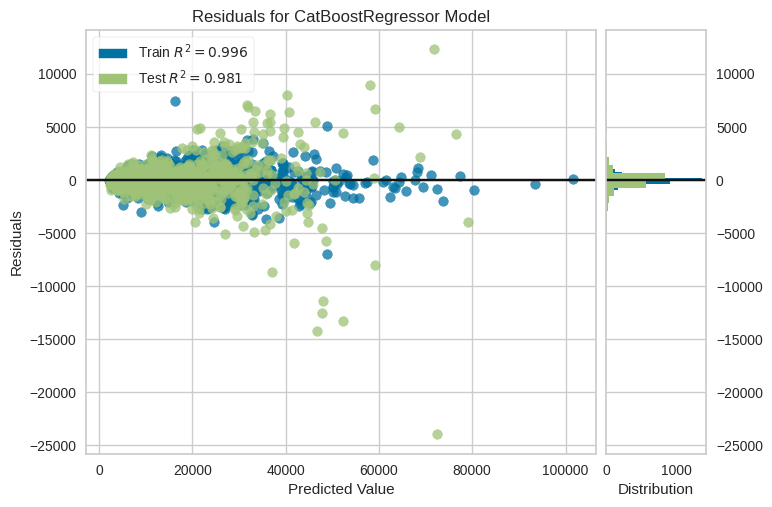

In [42]:
plot_model(best, plot = 'residuals')

*To control the scale of the plot*

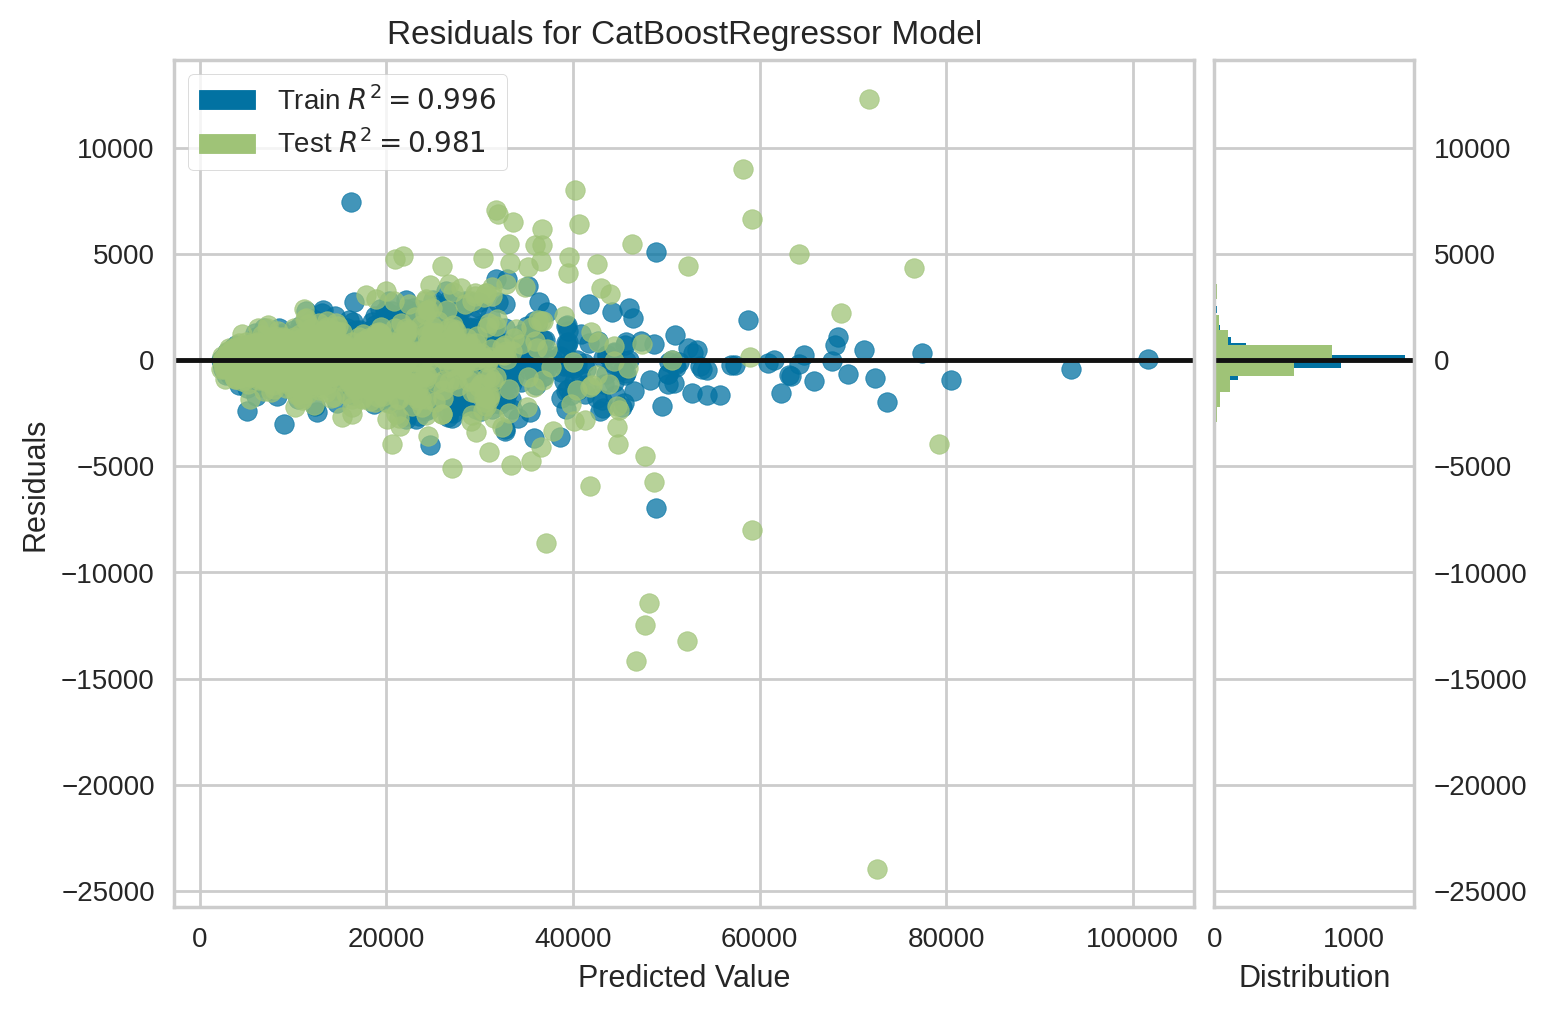

In [43]:
plot_model(best, plot = 'residuals', scale = 2)

To save the plot

In [44]:
plot_model(best, plot = 'residuals', save=True)

'Residuals.png'

**Interpret Model** : *The interpret_model function analyzes the predictions generated from a trained model. Most plots in this function are implemented based on the SHAP (Shapley Additive exPlanations).*

Train dt model

In [53]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1553.7421,11707943.2440,3421.6872,0.8853,0.1440,0.1094
1,1388.9841,11304424.7341,3362.2053,0.8531,0.1407,0.0994
2,1241.1825,6372859.8254,2524.4524,0.9543,0.1207,0.0870
3,1336.1270,8839732.9881,2973.1688,0.9067,0.1278,0.0954
4,1217.6230,7098928.5060,2664.3814,0.9069,0.1305,0.0917
5,1551.9233,12618594.7654,3552.2661,0.8647,0.1606,0.1122
6,1351.6257,9064464.8587,3010.7250,0.9046,0.1426,0.1082
7,1603.9881,27063968.0456,5202.3041,0.8076,0.1454,0.1037
8,1190.8677,4583178.7694,2140.8360,0.9487,0.1408,0.1073


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

*Interpret summary model*

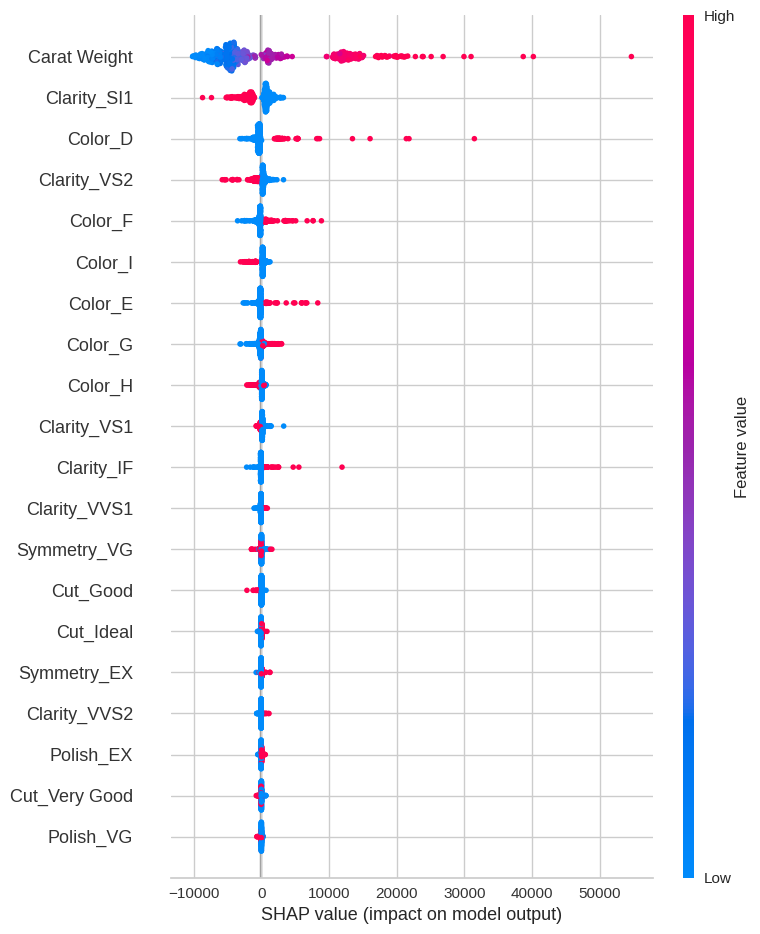

In [54]:
interpret_model(dt, plot = 'summary')

Reason plot for test set observation 1

In [55]:
interpret_model(dt, plot = 'reason', observation = 1)

**Get leaderboard** :  *This function returns the leaderboard of all models trained in the current setup.*

In [56]:
lb = get_leaderboard()
lb

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Linear Regression,"(TransformerWrapper(include=['Carat Weight'], ...",1.068438e+13,1.438364e+29,1.199318e+14,-1.022785e+21,0.7426,1.107269e+08
1,Decision Tree Regressor,"(TransformerWrapper(include=['Carat Weight'], ...",1.357572e+03,1.031689e+07,3.097684e+03,8.990000e-01,0.1376,1.005000e-01


*Sort the best model based on MAE*

In [57]:
lb.sort_values(by='MAE', ascending=True)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Carat Weight'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                             'Polish', 'Symmetry', 'Report'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['Rep...
                ('onehot_encoding',
                 TransformerWrapper(include=['Cut', 'Color', 'Clarity',
                                             'Polish', 'Symmetry'],
                                    transformer=OneHotEncoder(cols=['Cut',
                                                                    'Color',
                                                                    'Clarity',
                                                                    'Polish',
                                                                    'Symmetry'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ['trained_model', DecisionTreeRegressor(random_state=123)]])

**AutoML** : *This function returns the best model out of all trained models in the current setup based on the optimize parameter.*

In [58]:
automl()

DecisionTreeRegressor(random_state=123)

**Dashboard** : *The dashboard function generates the interactive dashboard for a trained model. The dashboard is implemented using ExplainerDashboard.*

In [59]:
dashboard(dt, display_format ='inline')

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>